In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore

# Grafiklerin Türkçe karakterli başlıklarda sorun yaşamaması için
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid")


In [4]:
from google.colab import files
uploaded = files.upload()

# Ardından:
import io
df = pd.read_csv(io.BytesIO(uploaded['health_dataset.csv']))


Saving health_dataset.csv to health_dataset.csv


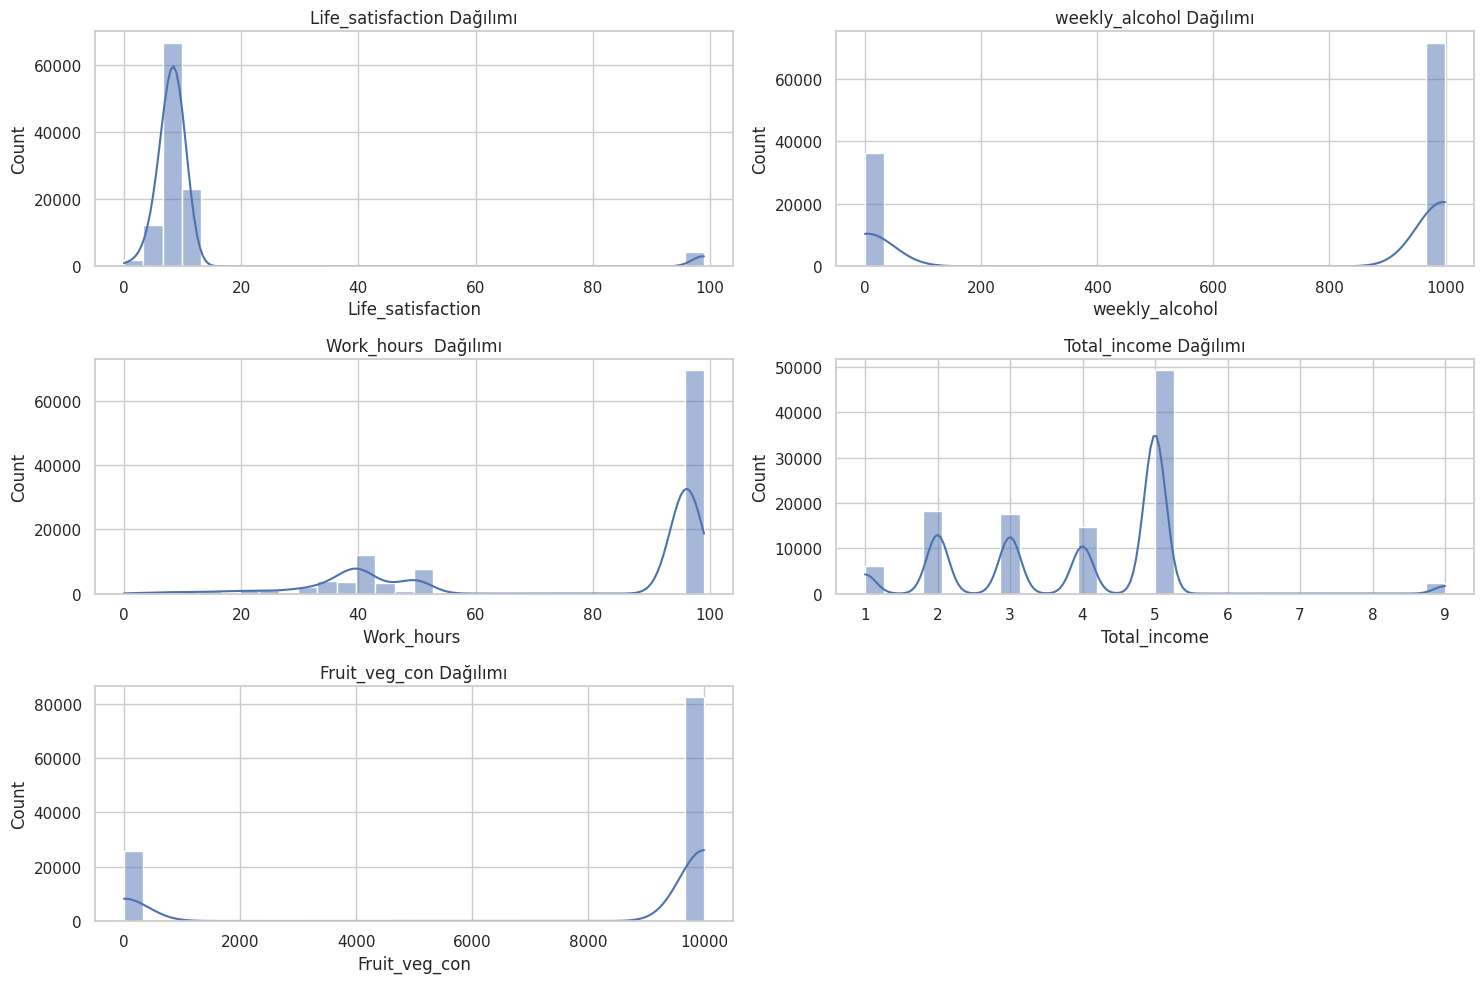

In [5]:
# Sürekli değişken listesi
continuous_vars = [
    'Life_satisfaction',
    'weekly_alcohol',
    'Work_hours ',
    'Total_income',
    'Fruit_veg_con'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"{col} Dağılımı")
plt.tight_layout()
plt.show()


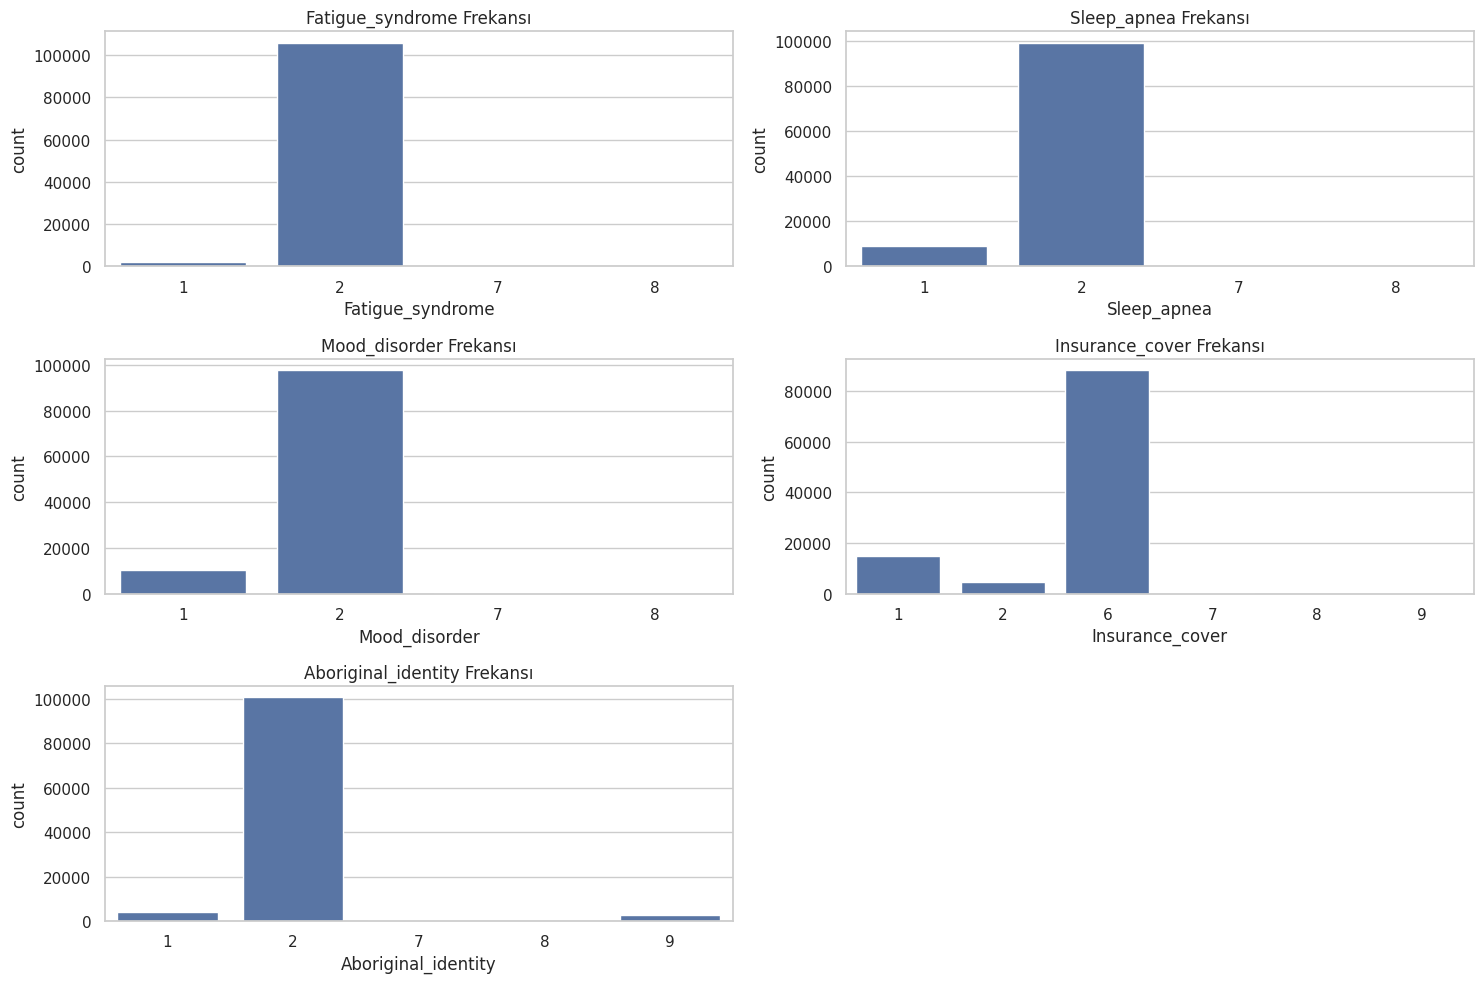

In [6]:
categorical_vars = [
    'Fatigue_syndrome',
    'Sleep_apnea',
    'Mood_disorder',
    'Insurance_cover',
    'Aboriginal_identity'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Frekansı")
plt.tight_layout()
plt.show()


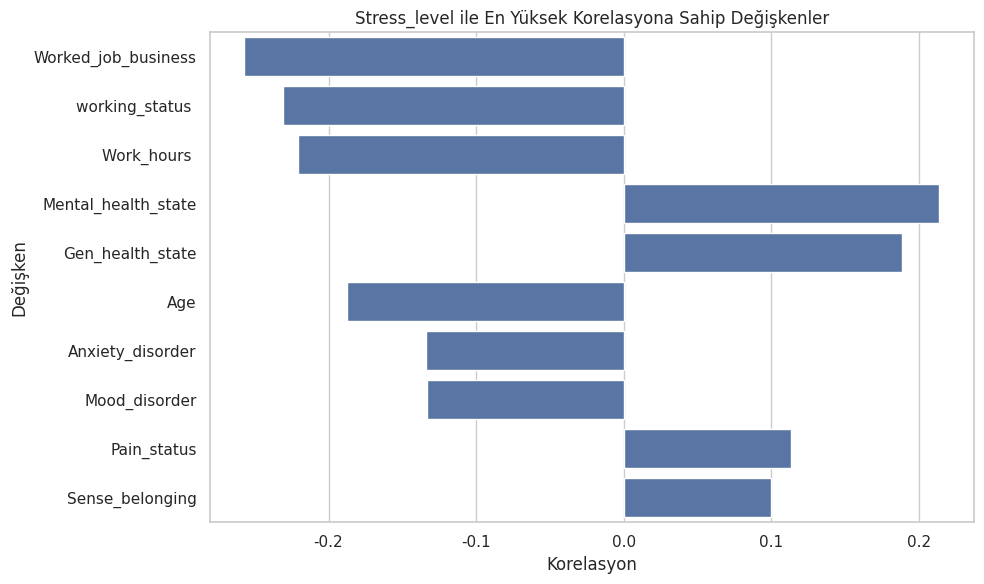

In [7]:
# Sayısal değişkenleri filtrele
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = df[numerical_cols].corr()
stress_corr = corr_matrix['Stress_level'].drop('Stress_level').sort_values(key=lambda x: abs(x), ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=stress_corr[:10], y=stress_corr[:10].index)
plt.title("Stress_level ile En Yüksek Korelasyona Sahip Değişkenler")
plt.xlabel("Korelasyon")
plt.ylabel("Değişken")
plt.tight_layout()
plt.show()


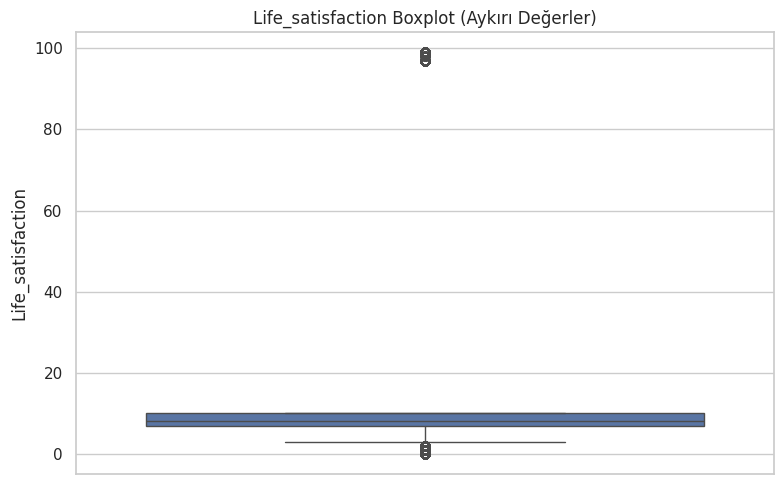

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Life_satisfaction')
plt.title("Life_satisfaction Boxplot (Aykırı Değerler)")
plt.tight_layout()
plt.show()


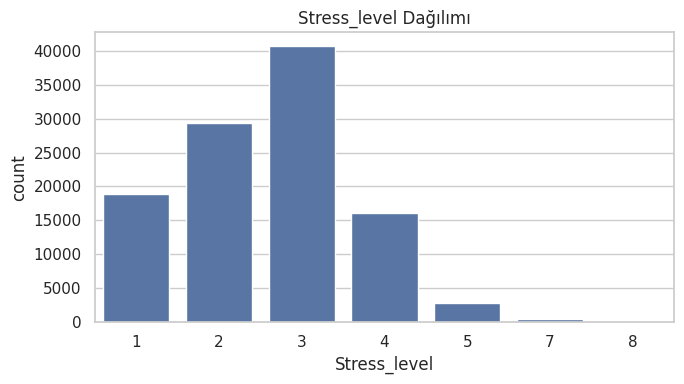

In [10]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Stress_level')
plt.title("Stress_level Dağılımı")
plt.tight_layout()
plt.show()

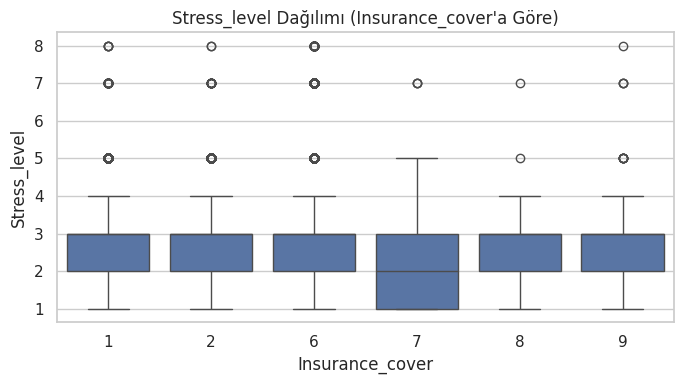

In [11]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Insurance_cover', y='Stress_level')
plt.title("Stress_level Dağılımı (Insurance_cover'a Göre)")
plt.tight_layout()
plt.show()